# Подготовка к работе с данными

In [1]:
## Установка библиотек и датасета

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file etc


#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
from yellowbrick.cluster import KElbowVisualizer

#scaling methods
from sklearn.preprocessing import StandardScaler

#clustering algorithms
from sklearn.cluster import KMeans

# Загрузка CSV-файла c нашими данными
data = pd.read_csv('spotify_dataset.csv')

# Вывод первых нескольких строк чтобы проверить корректно ли сохранились данные.
data.head()

C:\Users\dabze\AppData\Local\Temp\ipykernel_22036\2192329988.py:19: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('spotify_dataset.csv')


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


## Обработка данных

На предыдущем шаге мы увидели, что часть данных представлена не интерпретируеммыми признаками. Для начала данные надо очистить от таковых. Такие признаки как ссылка, id, unnamed и title нам не понадобятся.

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  type              42305 non-null  object 
 12  id                42305 non-null  object 
 13  uri               42305 non-null  object 
 14  track_href        42305 non-null  object 
 15  analysis_url      42305 non-null  object 
 16  duration_ms       42305 non-null  int64 

In [3]:
ids = data['id']
ids.info()


<class 'pandas.core.series.Series'>
RangeIndex: 42305 entries, 0 to 42304
Series name: id
Non-Null Count  Dtype 
--------------  ----- 
42305 non-null  object
dtypes: object(1)
memory usage: 330.6+ KB


In [4]:
data2 = data.drop(['id', 'uri', 'track_href', 'analysis_url', 'Unnamed: 0', 'title', 'type', 'song_name', 'genre'], axis=1)


In [5]:
data2.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,123298,4


Важно пройтись по итоговым признакам:

- **Danceability (Танцевальность):** Этот показатель оценивает, насколько подходит трек для танцев. Значение 0 означает, что трек трудно танцевать, а 1 - легко танцевать.

- **Energy (Энергия):** Этот признак измеряет энергетику трека и его интенсивность. Значение 0 представляет собой более спокойный и нежный трек, в то время как 1 - более энергичный и интенсивный.

- **Key (Тональность):** Это представление тональности трека в виде числа от 0 до 11, где 0 - C, 1 - C#, и так далее.

- **Loudness (Громкость):** Это мера громкости трека в децибелах (dB). Значение ближе к 0 указывает на более громкий трек.

- **Mode (Режим):** Этот бинарный признак указывает на то, в каком мажоре или миноре написан трек. 0 обозначает минор, 1 - мажор.

- **Speechiness (Речевость):** Этот признак оценивает наличие вокала в треке. Значение 0 означает, что трек весьма инструментальный, а 1 - полностью вокальный.

- **Acousticness (Акустичность):** Этот признак представляет собой меру того, насколько акустичен трек. Значение 0 означает, что трек весьма "неакустичен" (звучит как электронная музыка), а значение 1 указывает на полную акустичность (например, акустическая гитара).

- **Instrumentalness (Инструментальность):** Этот признак измеряет вероятность того, что трек является инструментальным. Значение 0 означает, что трек в высшей степени вокальный, а 1 - полностью инструментальный.

- **Liveness (Живость):** Этот признак измеряет вероятность того, что трек исполнен перед живой аудиторией. Значение 0 означает студийную запись, а 1 - живой выступление.

- **Valence (Валентность):** Этот признак измеряет "позитивность" трека. Значение 0 означает трек с негативным характером, а 1 - с положительным.

- **Tempo (Темп):** Это скорость трека, измеряемая в тактах в минуту (BPM).

- **Duration_ms (Длительность в миллисекундах):** Это просто длительность трека в миллисекундах.

- **Time Signature (Тактовая подпись):** Это предсказанная тактовая подпись трека, обычно 4 (четвертьневая).


Проверим, что все оставшиеся колонки не содержат пропусков, и имееют только числовые и категорические признаки.

In [6]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  int64  
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  int64  
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  int64  
 12  time_signature    42305 non-null  int64  
dtypes: float64(9), int64(4)
memory usage: 4.2 MB


## Шкалирование данных

Так как данные имеют различные числовые диапозоны, надо их сначала отмасштабировать, чтобы признаки лежали в одном диапазоне.

In [7]:
scaler = StandardScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(data2), columns=data2.columns)
scaled_data.info()
scaled_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42305 entries, 0 to 42304
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      42305 non-null  float64
 1   energy            42305 non-null  float64
 2   key               42305 non-null  float64
 3   loudness          42305 non-null  float64
 4   mode              42305 non-null  float64
 5   speechiness       42305 non-null  float64
 6   acousticness      42305 non-null  float64
 7   instrumentalness  42305 non-null  float64
 8   liveness          42305 non-null  float64
 9   valence           42305 non-null  float64
 10  tempo             42305 non-null  float64
 11  duration_ms       42305 non-null  float64
 12  time_signature    42305 non-null  float64
dtypes: float64(13)
memory usage: 4.2 MB


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,1.223608,0.280079,-0.919298,-0.305514,0.905517,2.246552,-0.212853,-0.727231,-0.902637,0.136790,0.398876,-1.226992,0.102184
1,0.508480,-1.466185,0.717318,-0.259954,0.905517,-0.453057,1.784518,-0.763370,-0.547231,-0.999586,-1.358564,-0.256796,0.102184
2,1.344924,0.709845,-0.100990,0.572039,0.905517,-0.588592,-0.482135,-0.763359,0.899456,-1.363655,2.959861,-1.476787,0.102184
3,-1.043093,0.100557,-1.464837,0.596860,0.905517,-0.266002,-0.424181,-0.763370,-0.570013,-0.780887,1.655485,-1.235520,-3.624453
4,1.012900,-0.753535,-0.919298,-0.408876,0.905517,1.239945,0.707390,-0.763370,-0.273841,1.003008,0.021554,-1.239046,0.102184


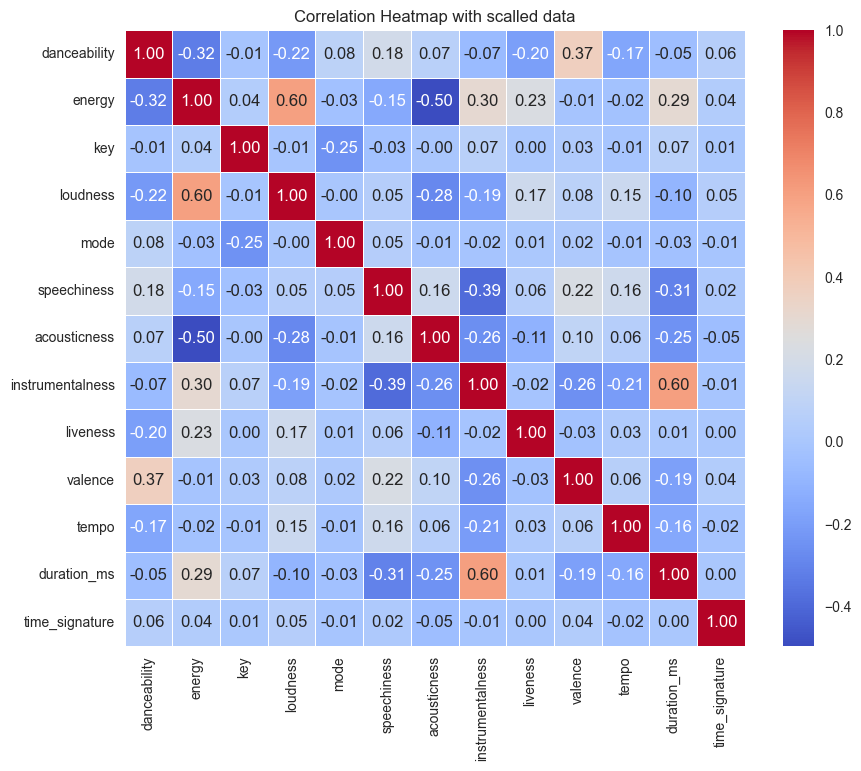

In [8]:
scaled_correlation_matrix = scaled_data.corr()plt.figure(figsize=(10, 8))
sns.heatmap(scaled_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap with scalled data')
plt.show()


Можно заметить довольно очевидные закономерности - громкость и энергичность коррелируют положительно, а вот акустичность и энергичность наоборот коррелируют резко отрицательно.
В принципе среди выбранных нами признаками нет таких, которые бы имели сильную корреляционную связь, поэтому мы вполне можем оставить выбранный нами набор признаков.


Определившись с набором признаков, построим для каждого из них гистограммы
* **1) Форму распределения данных**: Нормальное, равномерное, экспоненциальное и т.д.

* **2) Центральную тенденцию**: Где расположены средние значения данных.

* **3) Дисперсию и разброс данных**: Насколько данные разбросаны вокруг среднего значения.

* **4) Выбросы и аномалии**: Необычные значения, которые могут быть ошибочными или необычными в контексте остальных данных.

array([[<AxesSubplot: title={'center': 'danceability'}>,
        <AxesSubplot: title={'center': 'energy'}>],
       [<AxesSubplot: title={'center': 'key'}>,
        <AxesSubplot: title={'center': 'loudness'}>],
       [<AxesSubplot: title={'center': 'mode'}>,
        <AxesSubplot: title={'center': 'speechiness'}>],
       [<AxesSubplot: title={'center': 'acousticness'}>,
        <AxesSubplot: title={'center': 'instrumentalness'}>],
       [<AxesSubplot: title={'center': 'liveness'}>,
        <AxesSubplot: title={'center': 'valence'}>],
       [<AxesSubplot: title={'center': 'tempo'}>,
        <AxesSubplot: title={'center': 'duration_ms'}>],
       [<AxesSubplot: title={'center': 'time_signature'}>,
        <AxesSubplot: >]], dtype=object)

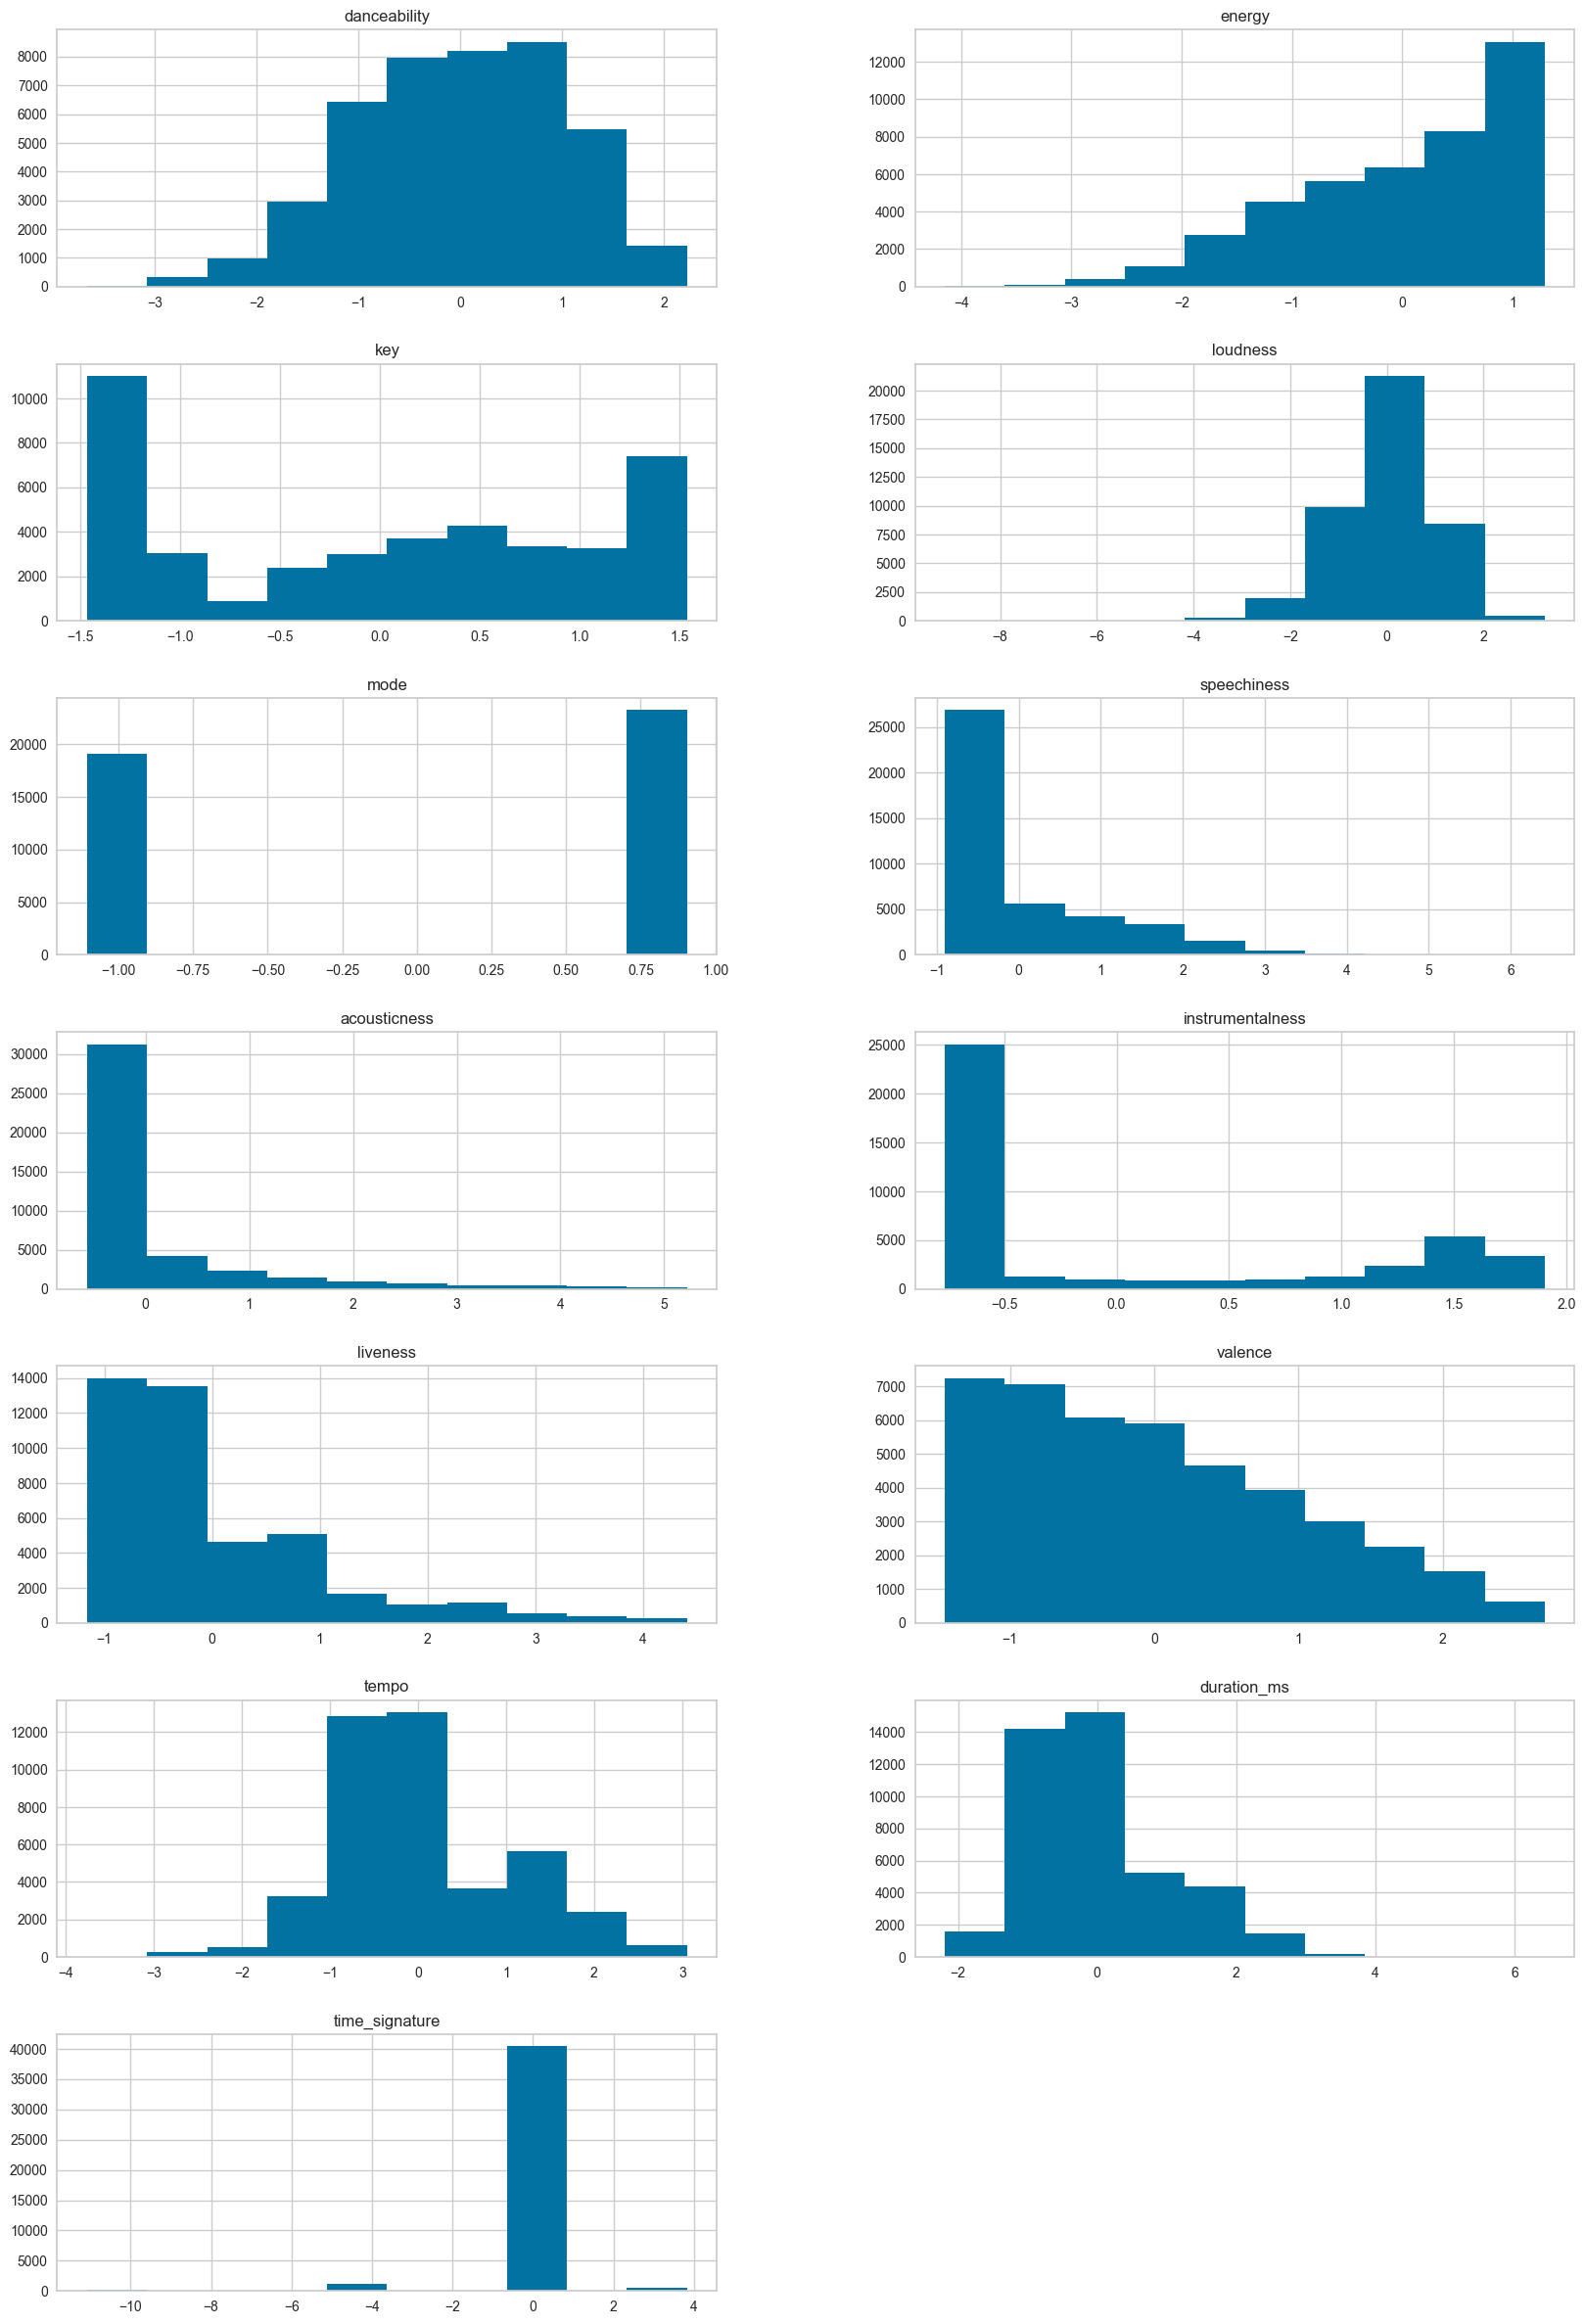

In [9]:
scaled_data.hist(layout=(7,2),figsize=(20, 30))

In [10]:
data.genre.unique()


array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [11]:
data.genre.unique().size

15

In [12]:
model = KMeans(init = 'k-means++', random_state = 1, n_init = 10)

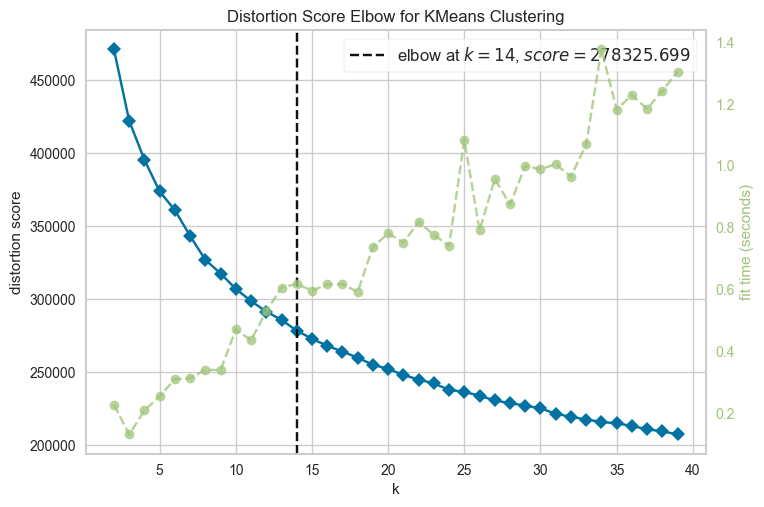

In [13]:
visualizer = KElbowVisualizer(model, k=(2,40))  # timings=False
visualizer.fit(scaled_data)
visualizer.show()
plt.show()

# Обучение Модели

## K-means Clustering

In [14]:
n_clusters = 15
kmeans = KMeans(n_clusters, random_state=1, n_init=10)
clusters = kmeans.fit_predict(scaled_data)

In [15]:
scaled_data["Genre Segments"] = clusters
scaled_data['Genre Segments'].info()
unique_values = scaled_data['Genre Segments'].unique()
# Вывод уникальных значений
print(unique_values)

<class 'pandas.core.series.Series'>
RangeIndex: 42305 entries, 0 to 42304
Series name: Genre Segments
Non-Null Count  Dtype
--------------  -----
42305 non-null  int32
dtypes: int32(1)
memory usage: 165.4 KB
[12  4  1 11  5  3  8  9  0  2 13 10  6  7 14]


In [16]:
scaled_data["Genre Segments"] = scaled_data["Genre Segments"].map(
    {
        0: "Кластер 1",
        1: "Кластер 2",
        2: "Кластер 3",
        3: "Кластер 4",
        4: "Кластер 5",
        5: "Кластер 6",
        6: "Кластер 7",
        7: "Кластер 8",
        8: "Кластер 9",
        9: "Кластер 10",
        10: "Кластер 11",
        11: "Кластер 12",
        12: "Кластер 13",
        13: "Кластер 14",
        14: "Кластер 15",
        })
scaled_data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Genre Segments
0,1.223608,0.280079,-0.919298,-0.305514,0.905517,2.246552,-0.212853,-0.727231,-0.902637,0.136790,0.398876,-1.226992,0.102184,Кластер 13
1,0.508480,-1.466185,0.717318,-0.259954,0.905517,-0.453057,1.784518,-0.763370,-0.547231,-0.999586,-1.358564,-0.256796,0.102184,Кластер 5
2,1.344924,0.709845,-0.100990,0.572039,0.905517,-0.588592,-0.482135,-0.763359,0.899456,-1.363655,2.959861,-1.476787,0.102184,Кластер 2
3,-1.043093,0.100557,-1.464837,0.596860,0.905517,-0.266002,-0.424181,-0.763370,-0.570013,-0.780887,1.655485,-1.235520,-3.624453,Кластер 12
4,1.012900,-0.753535,-0.919298,-0.408876,0.905517,1.239945,0.707390,-0.763370,-0.273841,1.003008,0.021554,-1.239046,0.102184,Кластер 13


In [17]:
scaled_data['Genre Segments'].head()

0    Кластер 13
1     Кластер 5
2     Кластер 2
3    Кластер 12
4    Кластер 13
Name: Genre Segments, dtype: object

In [18]:
scaled_data['Genre Segments'].iloc[:7]

0    Кластер 13
1     Кластер 5
2     Кластер 2
3    Кластер 12
4    Кластер 13
5    Кластер 13
6     Кластер 5
Name: Genre Segments, dtype: object

In [19]:
result = scaled_data[scaled_data['Genre Segments'] == 'Кластер 5']

# Вывод результатов
result.iloc[:15]

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Genre Segments
1,0.508480,-1.466185,0.717318,-0.259954,0.905517,-0.453057,1.784518,-0.763370,-0.547231,-0.999586,-1.358564,-0.256796,0.102184,Кластер 5
6,0.502095,-0.514172,0.717318,0.783183,0.905517,0.003483,-0.414229,-0.742334,-0.513057,-1.368372,-0.698197,-1.683059,0.102184,Кластер 5
10,1.434315,-2.162515,0.717318,-1.276230,0.905517,-0.563229,0.531771,-0.763370,-0.558622,-1.326348,1.780881,-1.453952,0.102184,Кластер 5
16,0.738342,-2.527000,-1.192067,-2.912675,0.905517,-0.357152,0.338590,0.123932,-0.644056,-1.371803,2.201107,-1.241416,0.102184,Кластер 5
17,1.115062,-1.020099,1.535626,-1.077667,0.905517,-0.579081,0.443961,-0.762585,-0.598491,-0.296319,-1.152058,-0.563664,0.102184,Кластер 5
20,-0.238574,-1.003779,-1.464837,0.290855,0.905517,-0.858077,-0.362129,-0.763370,-0.285232,-0.862363,-1.363764,-0.627497,0.102184,Кластер 5
30,1.268303,-0.699135,0.717318,-0.547598,0.905517,-0.344470,-0.531484,-0.763370,-0.587100,-0.570765,-1.371523,-0.802901,0.102184,Кластер 5
33,-1.177180,-1.292103,-0.100990,-2.117063,-1.104341,-0.721749,0.233219,1.216204,-0.507361,-0.334913,-1.152267,-0.882818,0.102184,Кластер 5
36,0.527635,-1.324743,-1.464837,-2.177924,0.905517,-0.673400,-0.414814,-0.732625,-0.142842,-0.982433,2.201778,-1.039593,0.102184,Кластер 5
37,0.112605,-1.574987,-1.192067,-1.899119,0.905517,-0.790706,0.795199,-0.693249,-0.604187,-0.875228,0.107151,-1.324500,0.102184,Кластер 5


In [20]:
scaled_data['Genre Segments'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 42305 entries, 0 to 42304
Series name: Genre Segments
Non-Null Count  Dtype 
--------------  ----- 
42305 non-null  object
dtypes: object(1)
memory usage: 330.6+ KB


<AxesSubplot: >

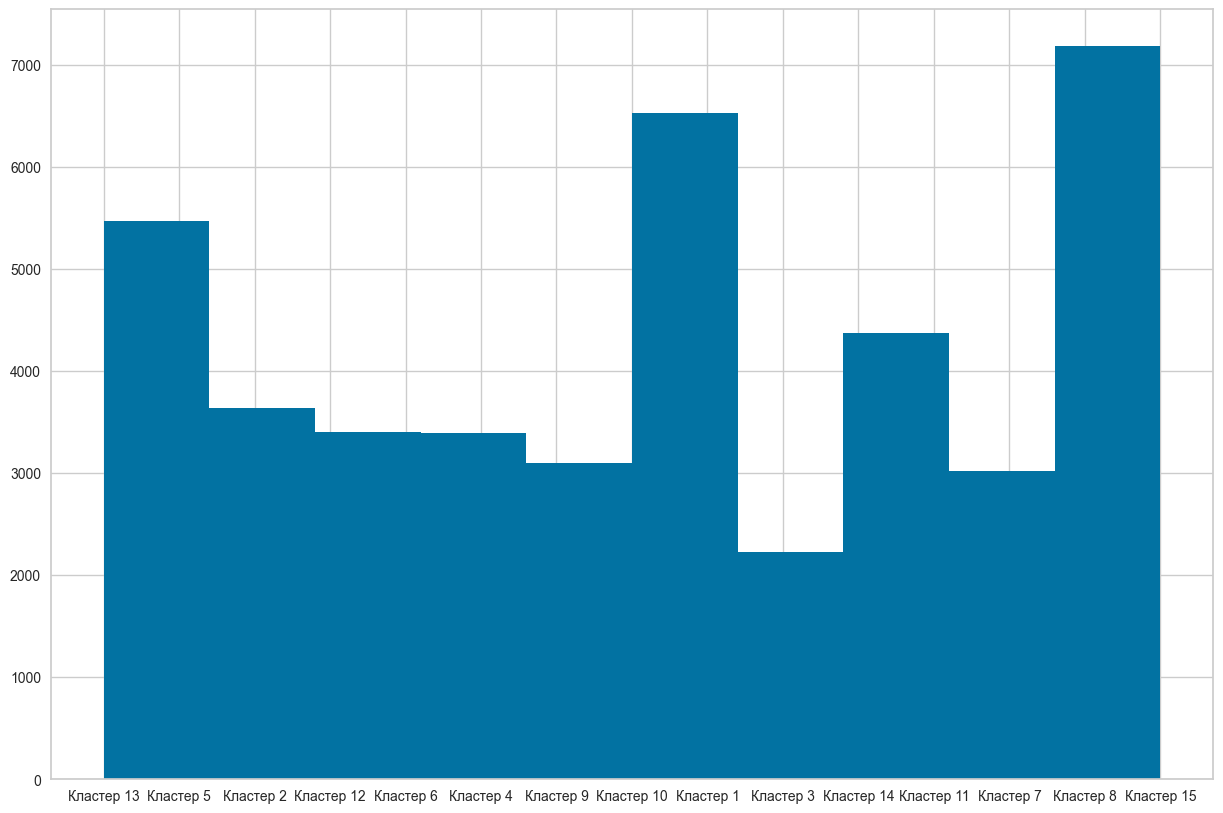

In [21]:
scaled_data['Genre Segments'].hist(figsize=(15, 10))

In [22]:
scaled_data_with_id = pd.concat([ids, scaled_data], axis=1)

In [23]:
scaled_data_with_id.head()

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Genre Segments
0,2Vc6NJ9PW9gD9q343XFRKx,1.223608,0.280079,-0.919298,-0.305514,0.905517,2.246552,-0.212853,-0.727231,-0.902637,0.136790,0.398876,-1.226992,0.102184,Кластер 13
1,7pgJBLVz5VmnL7uGHmRj6p,0.508480,-1.466185,0.717318,-0.259954,0.905517,-0.453057,1.784518,-0.763370,-0.547231,-0.999586,-1.358564,-0.256796,0.102184,Кластер 5
2,0vSWgAlfpye0WCGeNmuNhy,1.344924,0.709845,-0.100990,0.572039,0.905517,-0.588592,-0.482135,-0.763359,0.899456,-1.363655,2.959861,-1.476787,0.102184,Кластер 2
3,0VSXnJqQkwuH2ei1nOQ1nu,-1.043093,0.100557,-1.464837,0.596860,0.905517,-0.266002,-0.424181,-0.763370,-0.570013,-0.780887,1.655485,-1.235520,-3.624453,Кластер 12
4,4jCeguq9rMTlbMmPHuO7S3,1.012900,-0.753535,-0.919298,-0.408876,0.905517,1.239945,0.707390,-0.763370,-0.273841,1.003008,0.021554,-1.239046,0.102184,Кластер 13


In [24]:
scaled_data_with_id.to_csv(r'C:\Users\dabze\OneDrive\Рабочий стол\jupyter\scaled_clustered_data.csv', index=False)

In [25]:
data["Genre Segments"] = clusters

In [26]:
data.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title,Genre Segments
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN,12
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN,4
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN,1
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN,11
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN,12


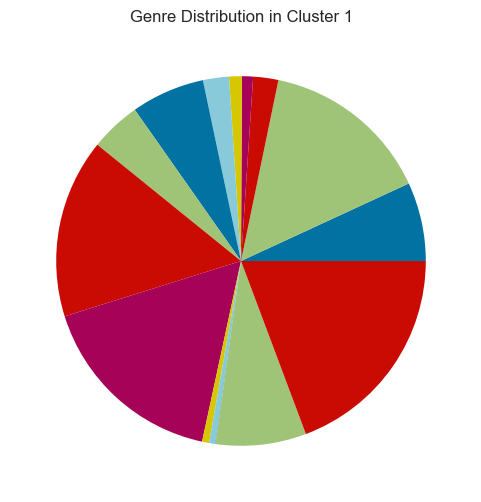

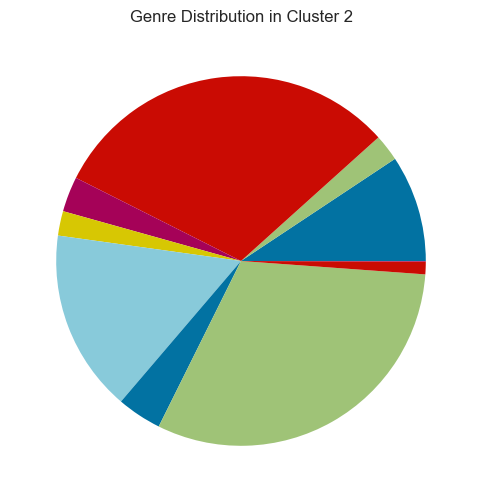

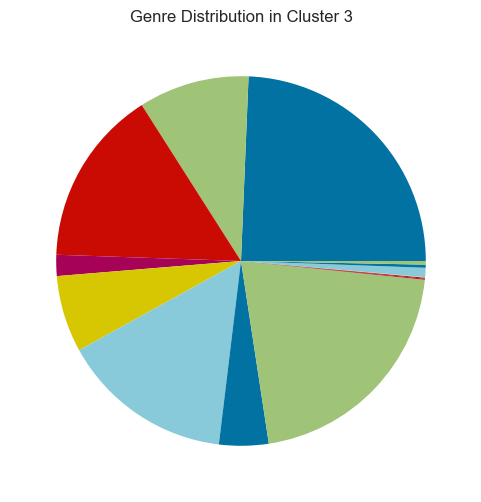

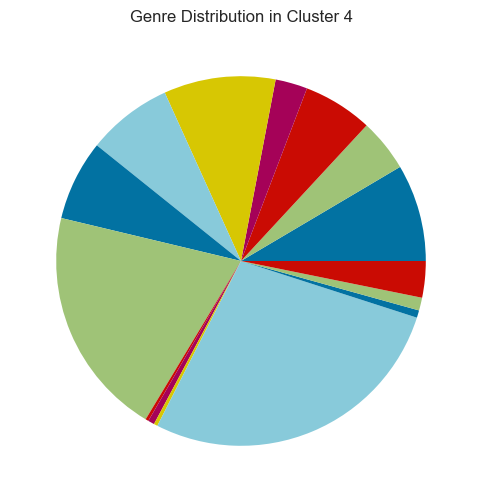

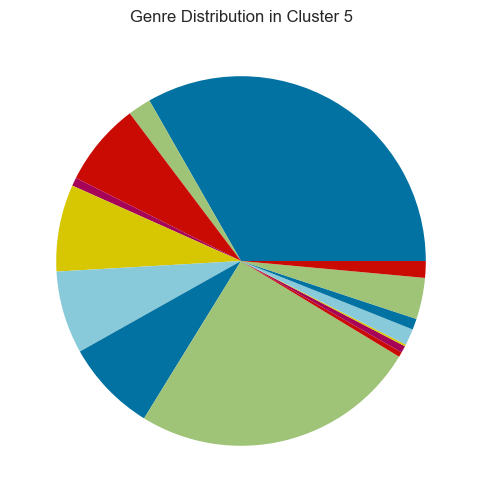

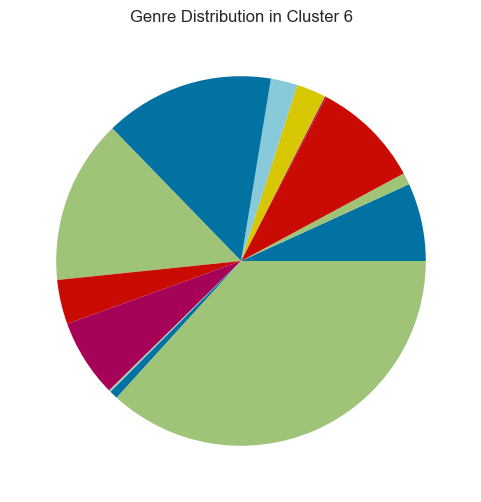

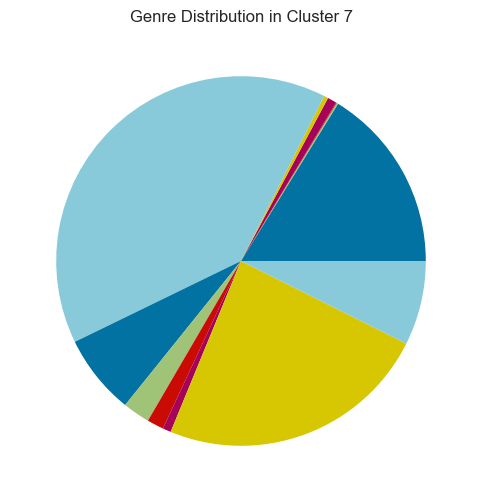

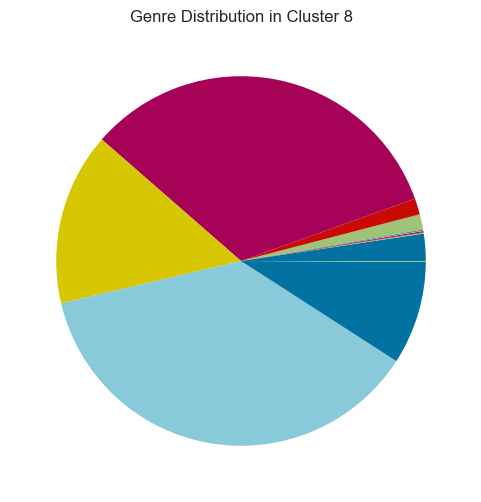

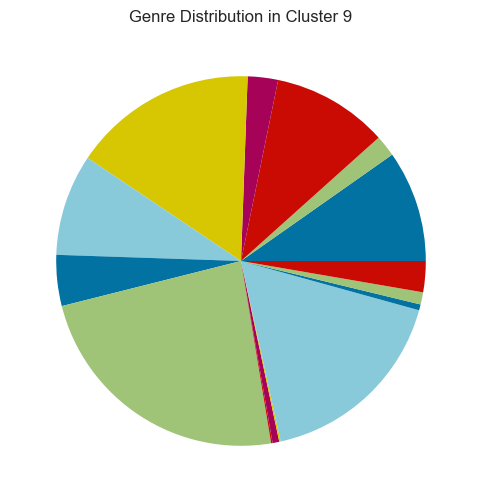

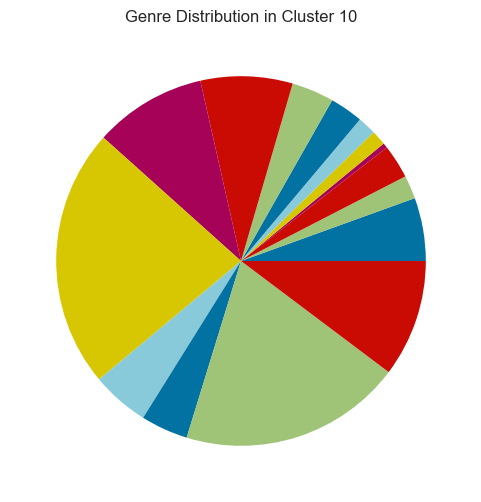

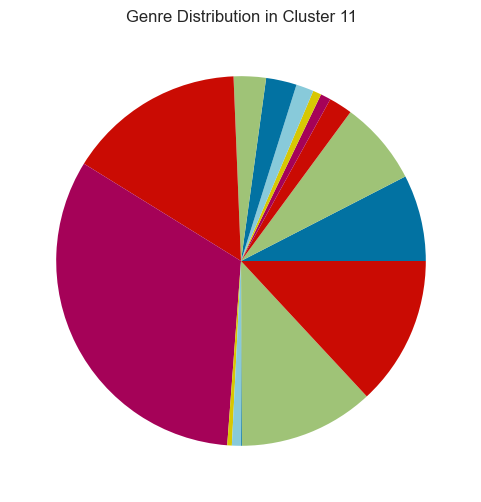

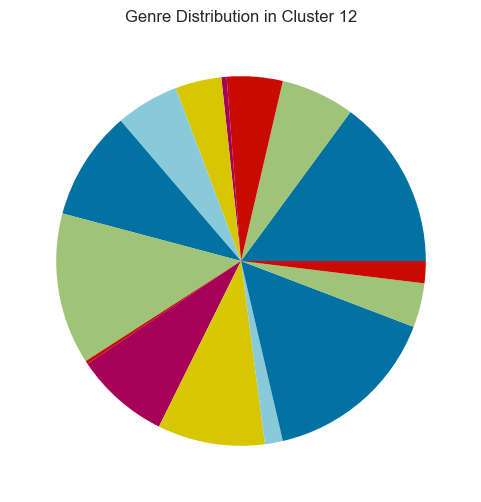

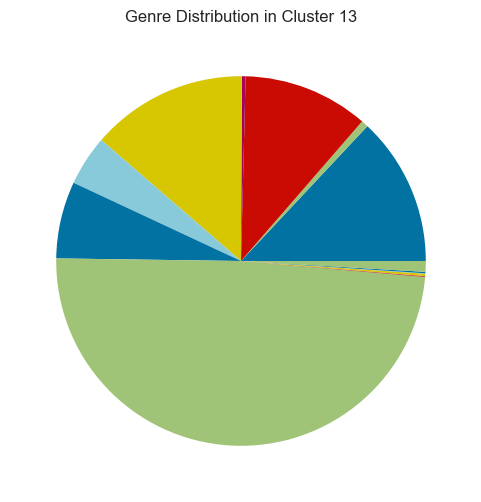

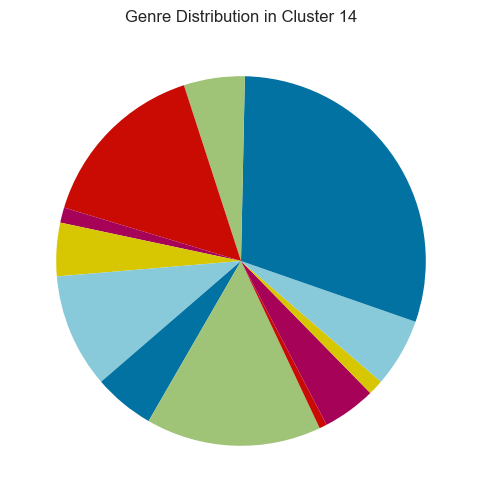

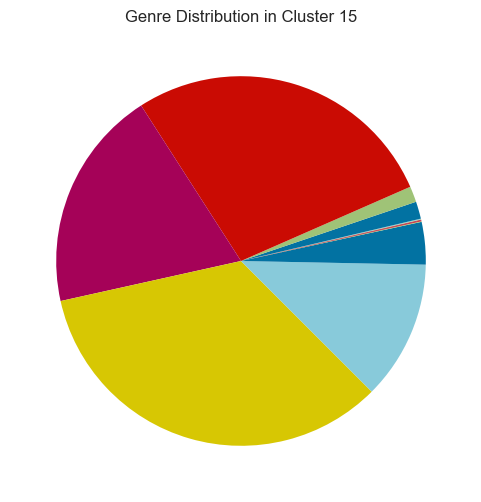

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

# Предположим, что у вас есть DataFrame с колонками 'Genre Segments' и 'genre', назовем его data
# data = ваш DataFrame

# Группировка данных по кластерам и жанрам, подсчет количества каждого жанра в кластере
cluster_genre_counts = data.groupby(['Genre Segments', 'genre']).size().reset_index(name='Count')

# Определение самого популярного жанра для каждого кластера
popular_genres = cluster_genre_counts.groupby('Genre Segments').apply(lambda x: x.loc[x['Count'].idxmax()])

# Создание круговых диаграмм для каждого кластера с отображением всех жанров в кластере
for cluster, cluster_data in cluster_genre_counts.groupby('Genre Segments'):
    genres = cluster_data['genre']
    counts = cluster_data['Count']
    
    plt.figure(figsize=(6, 6))
    plt.pie(counts,)
    plt.title(f'Genre Distribution in Cluster {cluster+1}')
    plt.show()


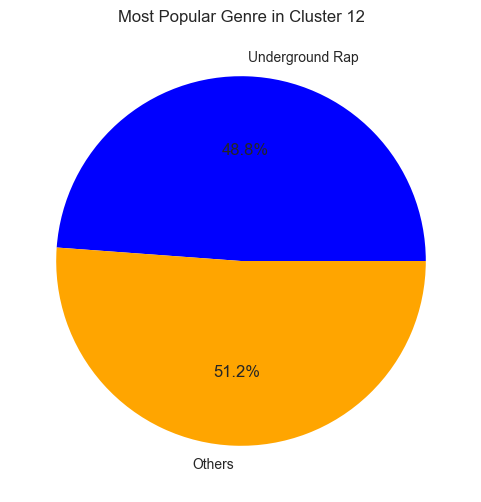

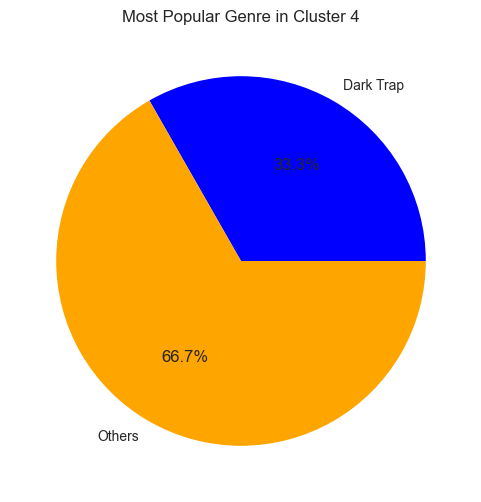

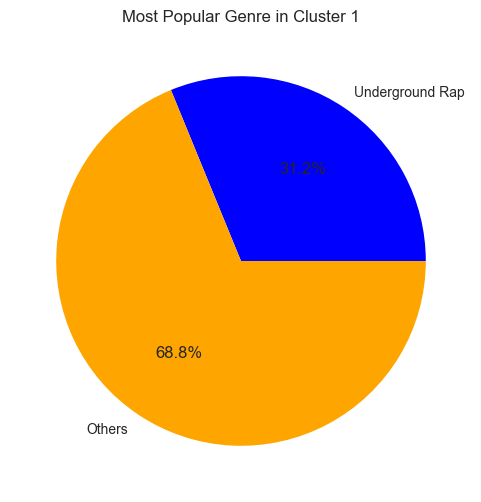

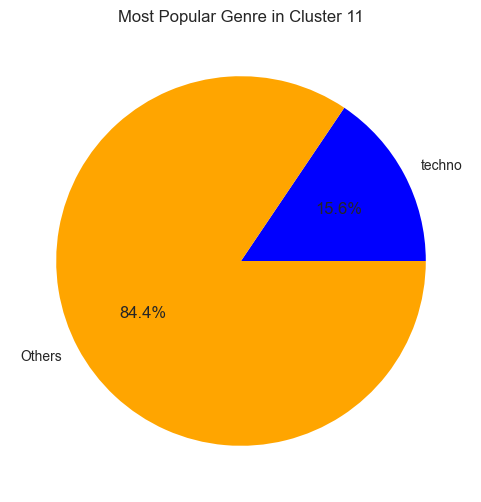

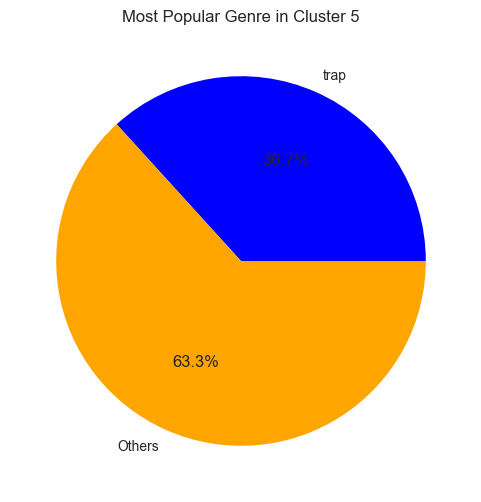

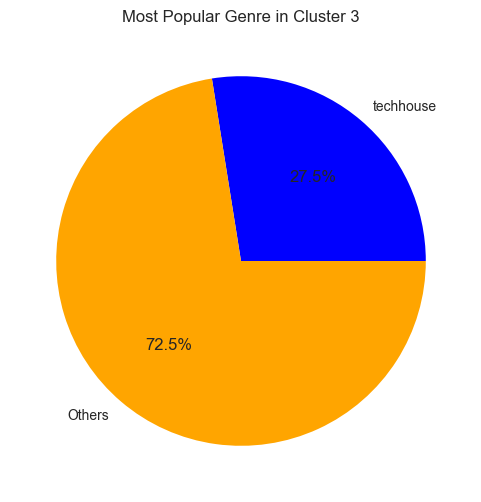

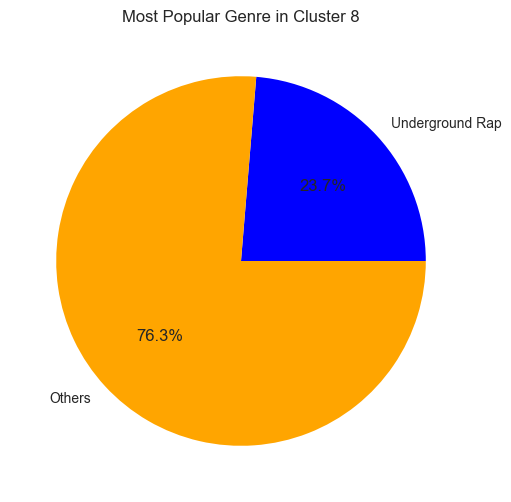

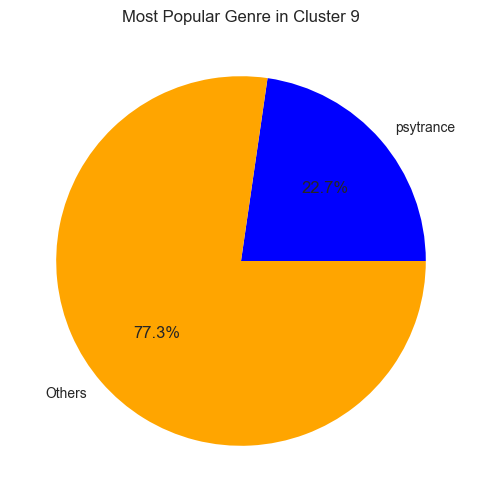

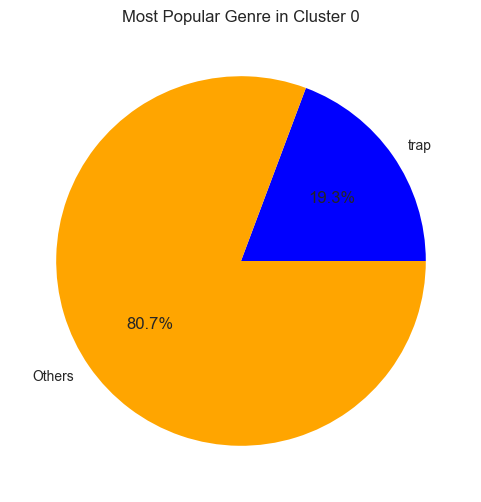

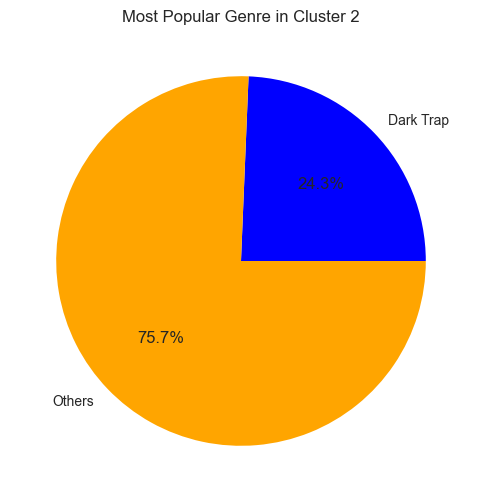

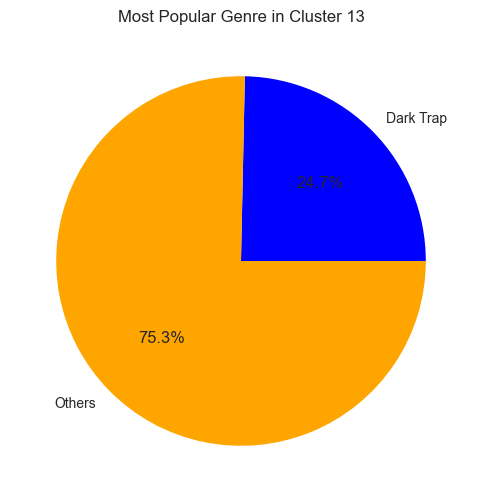

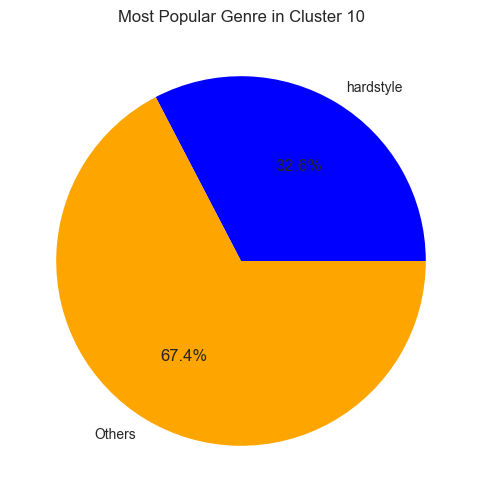

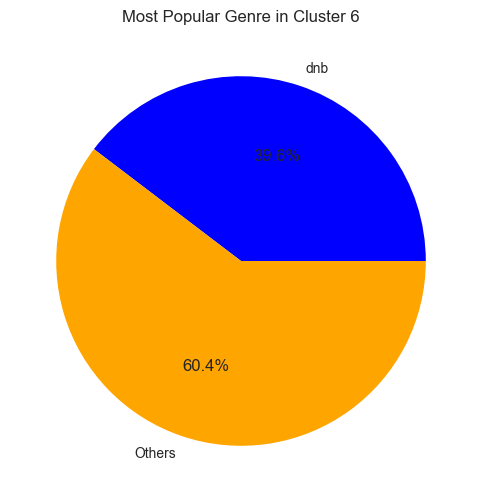

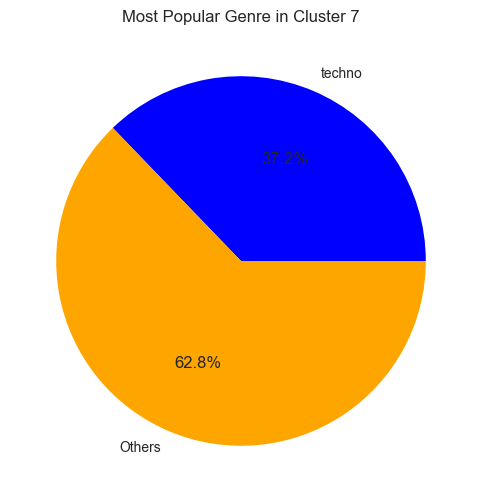

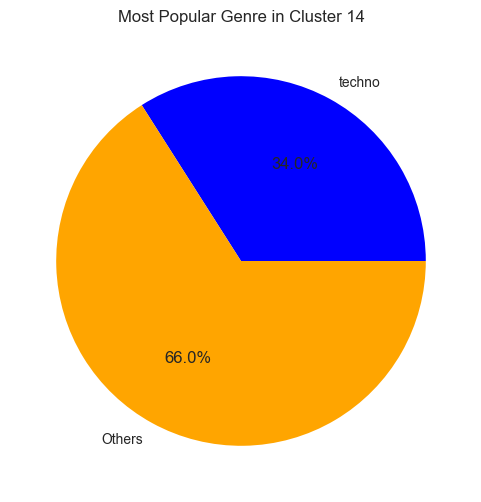

In [28]:
clusters = data['Genre Segments'].unique()

# Проходимся по каждому кластеру и строим круговую диаграмму
for cluster in clusters:
    # Фильтрация данных для конкретного кластера
    cluster_data = data[data['Genre Segments'] == cluster]
    
    # Подсчет количества каждого жанра внутри выбранного кластера
    genre_counts = cluster_data['genre'].value_counts()
    
    # Определение самого популярного жанра и остальных жанров
    most_popular_genre = genre_counts.idxmax()
    other_genres = genre_counts.drop(most_popular_genre)
    
    # Создание данных для диаграммы
    labels = [most_popular_genre, 'Others']
    sizes = [genre_counts[most_popular_genre], other_genres.sum()]
    colors = ['blue', 'orange']
    
    # Построение круговой диаграммы
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title(f'Most Popular Genre in Cluster {cluster}')
    plt.show()

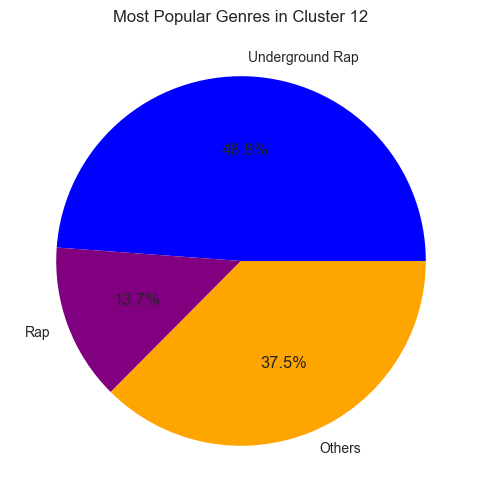

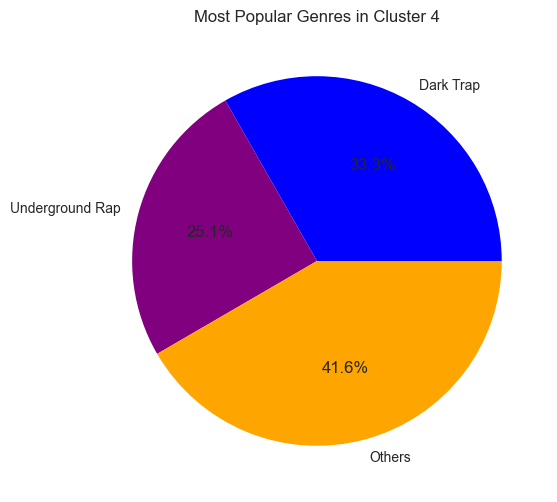

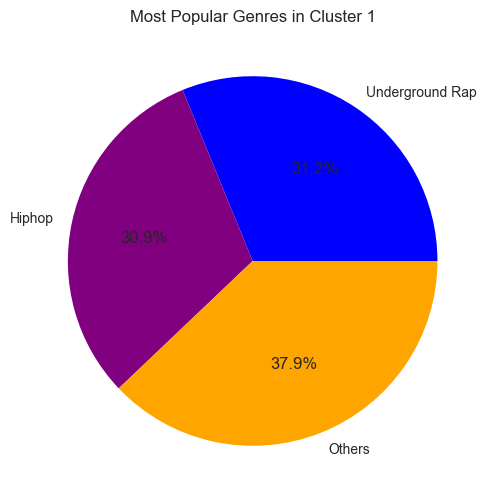

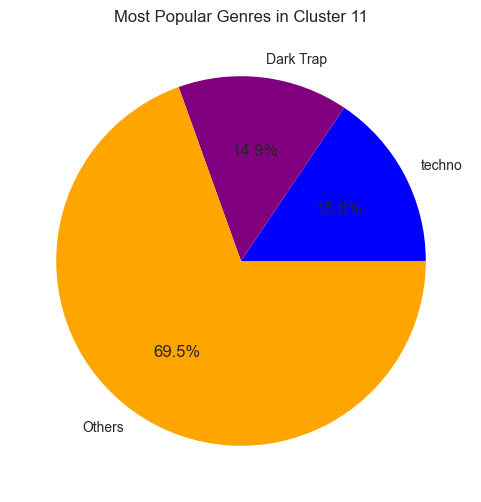

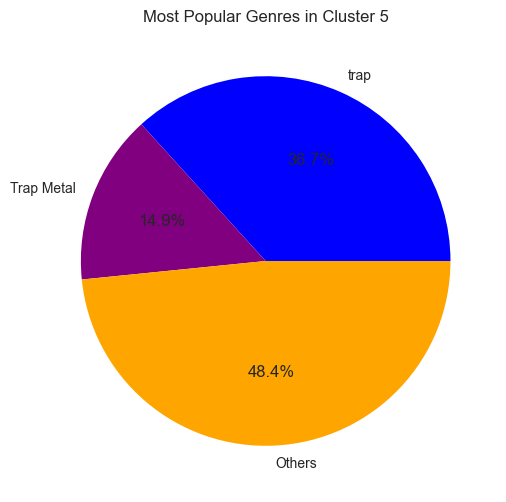

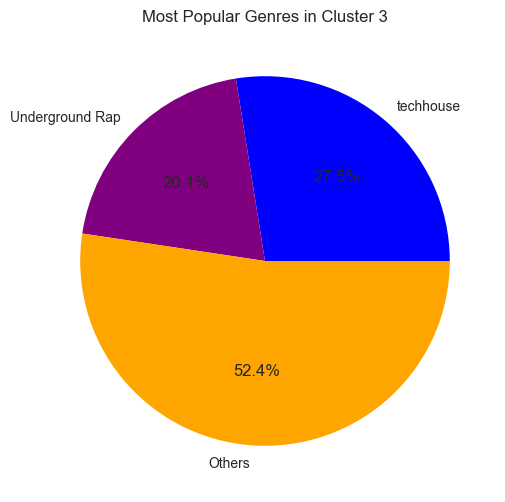

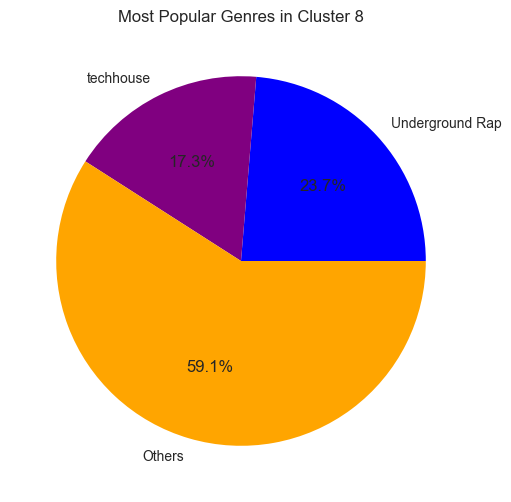

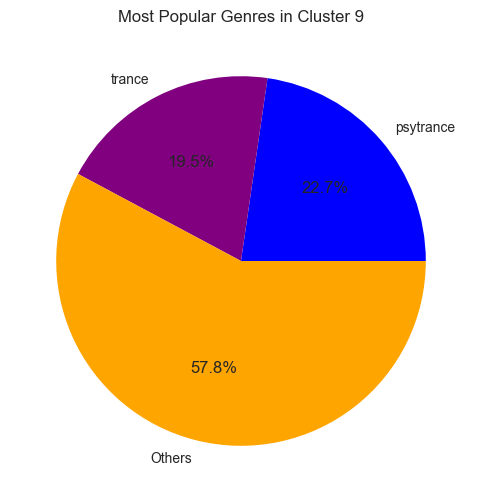

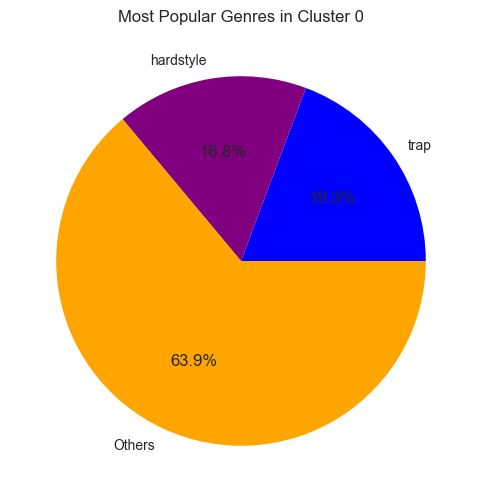

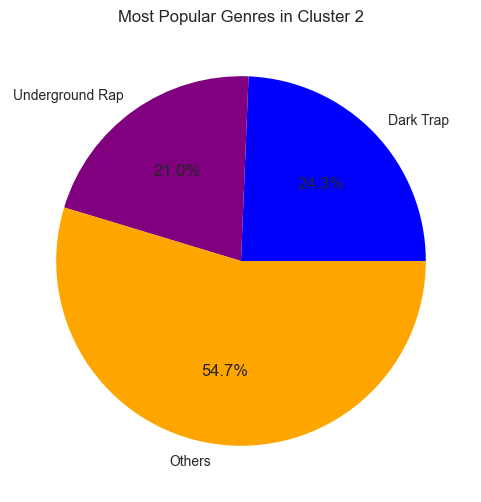

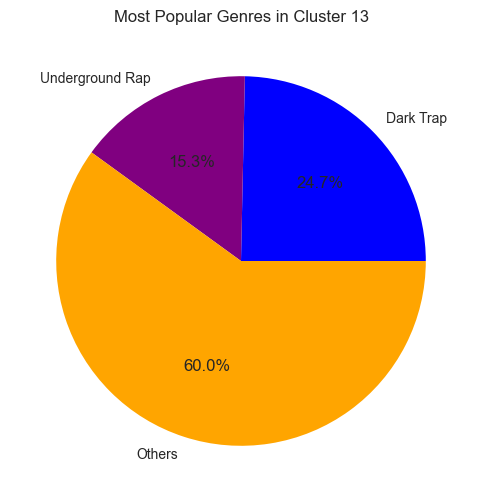

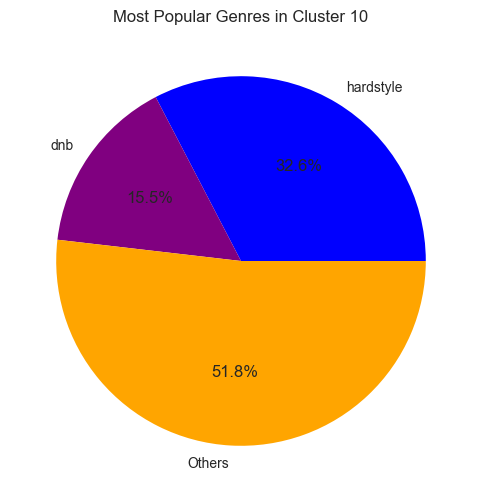

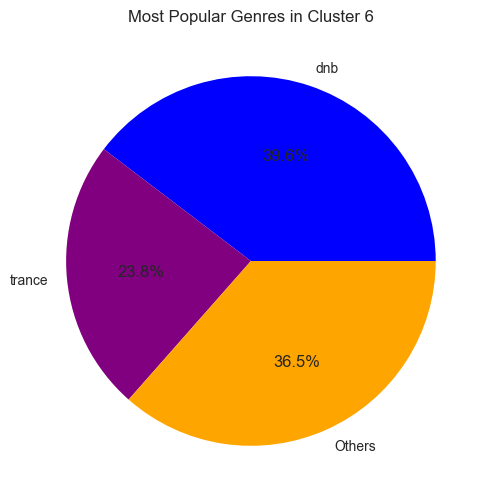

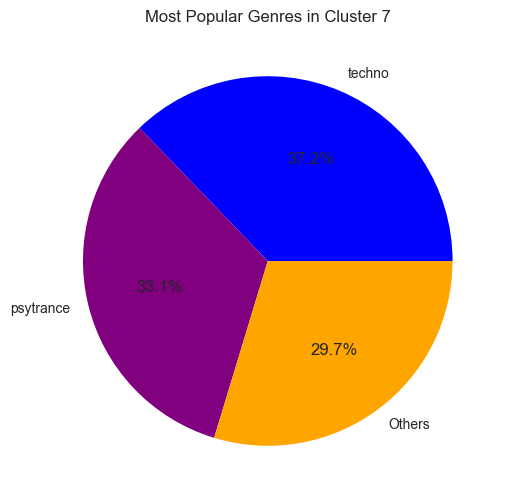

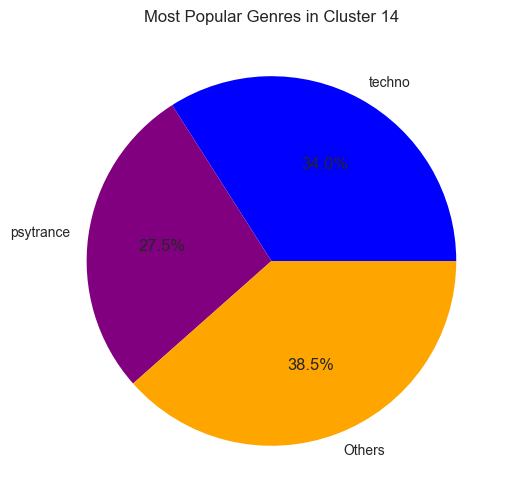

In [29]:
#Получение списка уникальных кластеров
clusters = data['Genre Segments'].unique()

# Проходимся по каждому кластеру и строим круговую диаграмму
for cluster in clusters:
    # Фильтрация данных для конкретного кластера
    cluster_data = data[data['Genre Segments'] == cluster]
    
    # Подсчет количества каждого жанра внутри выбранного кластера
    genre_counts = cluster_data['genre'].value_counts()
    
    # Определение самых популярных жанров
    most_popular_genres = genre_counts.head(2)
    other_genres = genre_counts.iloc[2:]
    
    # Создание данных для диаграммы
    labels = most_popular_genres.index.tolist() + ['Others']
    sizes = most_popular_genres.tolist() + [other_genres.sum()]
    colors = ['blue', 'purple', 'orange']
    
    # Построение круговой диаграммы
    plt.figure(figsize=(6, 6))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    plt.title(f'Most Popular Genres in Cluster {cluster}')
    plt.show()

<AxesSubplot: xlabel='Genre Segments', ylabel='energy'>

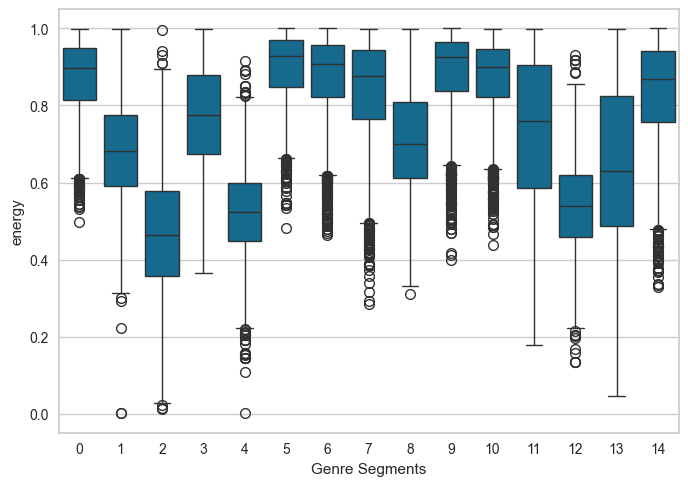

In [36]:
sns.boxplot(data =data, x = "Genre Segments", y = "energy")